# Introduction

This task is on computing discrete mean curvature using the discrete Laplace-Beltrami operator. You will implement the function marked with "TO IMPLEMENT".

**Initialisation Scripts**

Please run these once. They will install some required libraries and handle the imports.

**Task 1: Discrete Mean Curvature**

We provide several helper functions and an example implementation of using uniform weights for the discrete Laplace-Beltrami operator in the function def calculate_mean_curvature_uniform_weighting(mesh, vertex_idx).

The function you need to implement is def calculate_cotangent_weighted_diff_vector(mesh, vertex_idx). This function computes and uses cotangent weights instead of uniform weights. Note that unlike in the lecture, **we do not divide by the area term, but by the sum of all cotangent weights.**

**Run Code and Visualise Curvature**

You can test your implementation by running the scripts in this section. The first code cell has the necessary code to compute mean curvature for a test mesh. The following code cells can be run to visualise meshes colored with curvature in 3D.

With cotangent weights, you should be able to get results similar to these reference images of the rendered 3D object.

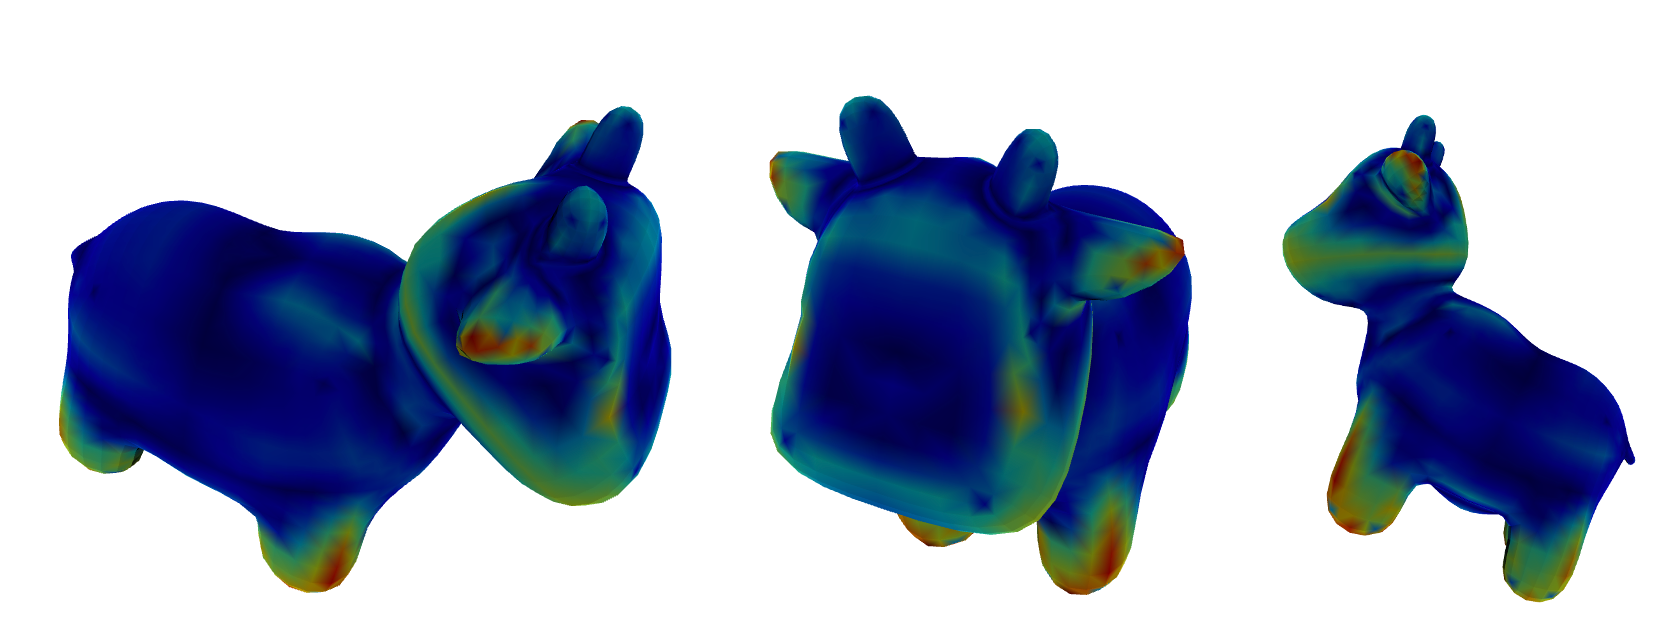



# Initialisation Scripts

In [ ]:
!pip install tensorflow-graphics
!pip install trimesh

import numpy as np
import tensorflow as tf
import trimesh
import math

# Discrete Mean Curvature

In [ ]:
np.zeros([1,3])

In [ ]:
def calculate_mean_curvature_uniform_weighting(mesh, vertex_idx):
  """

  This function illustrates how to compute mean curvature with uniform weights.
  In particular, please see how you retrieve the vertex with the id vertex_idx,
  and compute curvature with uniform weights and vector norm.

  """

  #Get the indices of neighboring vertices
  neighbor_idxs = (mesh.vertex_neighbors[vertex_idx])
  sum = np.zeros([1,3]) # 1 * 3 array

  #Sum each difference vector from vertex_idx to neighbor vertex j
  for each_neighbor_idx in neighbor_idxs:
    sum += (mesh.vertices[each_neighbor_idx] - mesh.vertices[vertex_idx])

  #Divide by the number of neighbors
  Lu_vi = sum / len(neighbor_idxs)

  #Compute the norm of the resulting vector
  return np.linalg.norm(Lu_vi) / 2 # return H


def calculate_mean_curvature_cotangent_weighting(mesh, vertex_idx):
  """

  This function computes mean curvature with cotangent weights. You will
  implement the essential function that this function is utilizing:
  calculate_cotangent_weights.

  """

  cot_weighted_difference_vector = calculate_cotangent_weighted_diff_vector(mesh, vertex_idx)
  return np.linalg.norm(cot_weighted_difference_vector) / 2


def calculate_cotangent_weighted_diff_vector(mesh, vertex_idx):
  """

  TO IMPLEMENT

  Arguments:
    mesh: The mesh to process.
    vertex_idx: The index of the vertex to compute the curvature at.

  Returns:
    The cotangent weighted and averaged difference vectors from the current vertex 
    to the neighbors, i.e. the discrete Laplace-Beltrami at vertex with index
    vertex_idx without dividing by the area term and instead dividing by the sum
    of all cotangent weights: 
    sum_i (cot_weights[i] * diff_vectors[i]) / sum_i (cot_weights[i]).

  Please see the implementation of 
  def calculate_mean_curvature_uniform_weighting(mesh, vertex_idx)
  to understand how the arguments are used, and 
  def calculate_mean_curvature_cotangent_weighting(mesh, vertex_idx)
  to see how the mean curvature is computed using the output of this
  function.

  """

  #Get neighnor indices
  neighbor_idxs = (mesh.vertex_neighbors[vertex_idx])

  #Compute each cotangent weight, multiply with the difference vector from the
  #neighbor, and sum all the weighted difference vectors
  sum = 0
  cot_val_total = 0
  for each_neighbor_idx in neighbor_idxs:
    common_neighbors = find_common_neighbor_vertices(mesh, vertex_idx, each_neighbor_idx)
    cot_val = 0
    for i in common_neighbors:
      v_1 = mesh.vertices[vertex_idx] - mesh.vertices[i]
      v_2 = mesh.vertices[each_neighbor_idx] - mesh.vertices[i]
      angle = find_angle_between_two_vectors(v_1, v_2) # angle between two vectors
      cot_val += (math.cos(angle) / math.sin(angle))
    cot_val_total += cot_val
    sum += 1/2 * cot_val *(mesh.vertices[vertex_idx] - mesh.vertices[each_neighbor_idx])

  return sum / cot_val_total


def find_common_neighbor_vertices(mesh, v1_idx, v2_idx):
  """

  This function returns the indices of the common neighbors of vertices with
  indices v1_idx and v2_idx.

  """

  v1_neighbors = (mesh.vertex_neighbors[v1_idx])
  v2_neighbors = (mesh.vertex_neighbors[v2_idx])
  common_neighbors = list(set(v1_neighbors).intersection(v2_neighbors))
  return common_neighbors
    

def find_angle_between_two_vectors(v_1, v_2):
  """

  This function returns the angle between the vectors v_1 and v_2

  """

  angle = math.acos(np.dot(v_1, v_2) / (np.linalg.norm(v_1)*np.linalg.norm(v_2)))
  return angle # in radians

# Run Code and Visualise Curvature

In [ ]:
# Download the mesh.
# Courtesy of Keenan Crane www.cs.cmu.edu/~kmcrane/Projects/ModelRepository/.
!wget https://storage.googleapis.com/tensorflow-graphics/notebooks/index/cow.obj

# Load the mesh.
mesh = trimesh.load("cow.obj")

mean_curvature_uniform_weights = []
mean_curvature_cotangent_weights = []

# Calculate mean curvature with two different methods
for i, each in enumerate(mesh.vertices):
  mean_curvature_uniform_weights.append(calculate_mean_curvature_uniform_weighting(mesh, i))
  mean_curvature_cotangent_weights.append(calculate_mean_curvature_cotangent_weighting(mesh, i))

mean_curvature_tensor0 = tf.convert_to_tensor(mean_curvature_uniform_weights)
mean_curvature_tensor1 = tf.convert_to_tensor(mean_curvature_cotangent_weights)

In [ ]:
# Visualise mean curvature calculated with uniform weighting
mesh.visual.vertex_colors = trimesh.visual.color.interpolate(mean_curvature_tensor0, "jet")
mesh.show(height = 400)

In [ ]:
# Visualise mean curvature calculated with cotangent weighting
mesh.visual.vertex_colors = trimesh.visual.color.interpolate(mean_curvature_tensor1, "jet")
mesh.show(height = 400)